In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('InternetSales.csv', encoding='latin1')

/tmp/ipython-input-3579264031.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('InternetSales.csv', encoding='latin1')


In [6]:
# Display first few rows
print(df.head())

# Show column names
print("\nColumns:", df.columns.tolist())

   ID  CustomerKey  GeographyKey         City CountryRegionCode  \
0   0        11000            26  Rockhampton                AU   
1   1        11000            26  Rockhampton                AU   
2   2        11000            26  Rockhampton                AU   
3   3        11000            26  Rockhampton                AU   
4   4        11000            26  Rockhampton                AU   

  EnglishCountryRegionName CustomerAlternateKey Title FirstName MiddleName  \
0                Australia           AW00011000   NaN       Jon          V   
1                Australia           AW00011000   NaN       Jon          V   
2                Australia           AW00011000   NaN       Jon          V   
3                Australia           AW00011000   NaN       Jon          V   
4                Australia           AW00011000   NaN       Jon          V   

   ... ProductStandardCost  TotalProductCost SalesAmount    TaxAmt  Freight  \
0  ...           1912.1544         1912.1544     

In [7]:
# Ensure OrderDate is recognized as a date
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Drop rows where OrderDate or SalesAmount is missing
df = df.dropna(subset=['OrderDate', 'SalesAmount'])

# Extract year from OrderDate
df['Year'] = df['OrderDate'].dt.year

# Group by year and calculate total sales
yearly_sales = df.groupby('Year')['SalesAmount'].sum().reset_index()

# Sort by year
yearly_sales = yearly_sales.sort_values('Year')

print("\nYearly Sales Summary:")
print(yearly_sales)


Yearly Sales Summary:
   Year   SalesAmount
0  2010  4.342104e+04
1  2011  7.075526e+06
2  2012  5.842485e+06
3  2013  1.635155e+07
4  2014  4.569472e+04


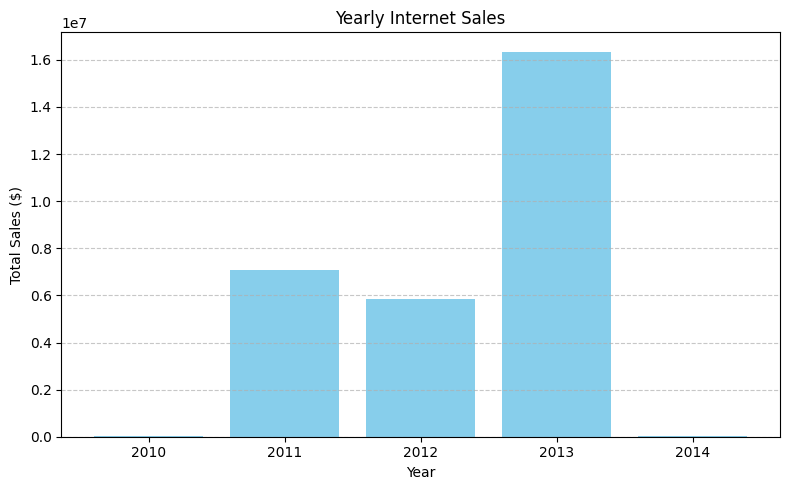

In [8]:
# --- Create the Bar Chart ---
plt.figure(figsize=(8,5))
plt.bar(yearly_sales['Year'], yearly_sales['SalesAmount'], color='skyblue')
plt.title('Yearly Internet Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- Save to PDF ---
plt.savefig('Yearly_Sales_BarChart.pdf')

# --- Show the chart ---
plt.show()